<a href="https://colab.research.google.com/github/swapnil-092/Vehicle_Detection_CNN_python/blob/main/Fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [2]:
!kaggle datasets download -d brsdincer/vehicle-detection-image-set

 95% 113M/119M [00:01<00:00, 85.2MB/s] 
100% 119M/119M [00:01<00:00, 85.1MB/s]


In [3]:
zip_ref = zipfile.ZipFile('/content/vehicle-detection-image-set.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /tmp folder
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras. layers import Dense, Flatten
from keras.applications.vgg16 import VGG16
import cv2
from sklearn.model_selection import train_test_split

In [5]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1' :
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False
for layer in conv_base.layers:
  print(layer.name, layer.trainable)


input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [7]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [8]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense('256',activation = 'relu'))
model.add(Dense('1',activation = 'sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [10]:
# generators
ds = keras. utils. image_dataset_from_directory(
  directory = '/content/data',
  labels= 'inferred',
  label_mode = 'int',
  batch_size=32,
  validation_split = 0.2,
  image_size=(150,150),
  subset='training',
  seed = 123
)

validation_ds = keras. utils. image_dataset_from_directory(
  directory = '/content/data',
  labels= 'inferred',
  label_mode = 'int',
  batch_size=32,
  validation_split = 0.2,
  image_size=(150,150),
  subset='validation',
  seed =123
)


Found 17760 files belonging to 2 classes.
Using 14208 files for training.
Found 17760 files belonging to 2 classes.
Using 3552 files for validation.


In [11]:
#Normalize
def process (image, label):
   image = tf. cast(image/255. , tf. float32)
   return image, label
ds = ds.map(process)
validation_ds = validation_ds.map(process)


In [12]:
model.compile(optimizer = keras.optimizers.RMSprop(lr=1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(ds, epochs = 4, validation_data = validation_ds)

Epoch 1/4
444/444 [==============================] - 5534s 12s/step - loss: 2.3479 - accuracy: 0.9448 - val_loss: 0.0165 - val_accuracy: 0.9949
Epoch 2/4
444/444 [==============================] - 5252s 12s/step - loss: 0.0305 - accuracy: 0.9916 - val_loss: 0.0125 - val_accuracy: 0.9963
Epoch 3/4
444/444 [==============================] - 5252s 12s/step - loss: 0.0206 - accuracy: 0.9953 - val_loss: 0.0102 - val_accuracy: 0.9972
Epoch 4/4
444/444 [==============================] - 5220s 12s/step - loss: 0.0203 - accuracy: 0.9961 - val_loss: 0.0320 - val_accuracy: 0.9966


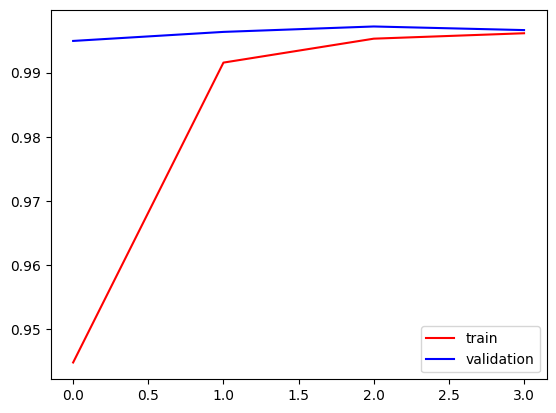

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color= 'red' ,label= 'train')
plt.plot(history.history['val_accuracy'], color= 'blue' ,label= 'validation')
plt.legend()
plt.show()


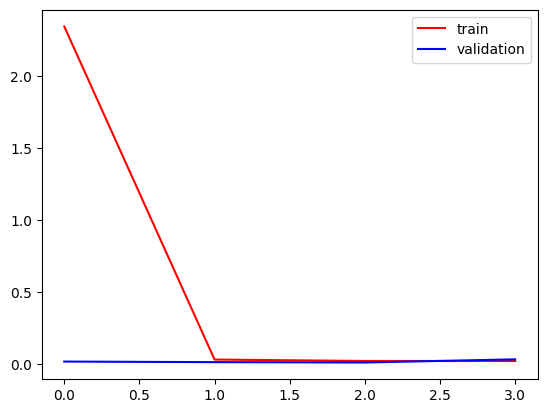

In [17]:
plt.plot(history.history['loss'], color= 'red' ,label= 'train')
plt.plot(history.history['val_loss'], color= 'blue' ,label= 'validation')
plt.legend()
plt.show()